# ZOMATO DATA ANALYSIS PROJECT

zomato has average of 17.5 million monthly customers for its food delivery buisness .average monthly active food delivery restaurant partners on zomato's platform have also increased by 8.7% year on year , from 2,08,000 to 226,000.You are working in a data driven role at zomato .You have a datset of customers. As a data professional , you need to analyze the data perform EDA and visualisation and answer the following questions :
1. what type of restaurant do the majority of customers order from?
2. how many votes has each type of restaurant received from customers ?
3. what are the ratings that majority of restaurants have received ?
4. zomato has observed that most couples order most of their food online . What is their avg spendings on each order ?
5. Which mode (offline/online) has received maximum rating ?
6. What type of restaurant received more offline orders ,so that zomato can partner with customers with some good offers ?

# importing libraries -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# create the data frame

In [8]:
df= pd.read_csv("Zomato_data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# data cleaning 

# convert data type of column rate

In [9]:
def handlerate(value):
    value=str(value).split('/')
    value = value[0]
    return float(value)

df['rate']=df['rate'].apply(handlerate)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

# Q1. what type of restaurant do the majority of customers order from?

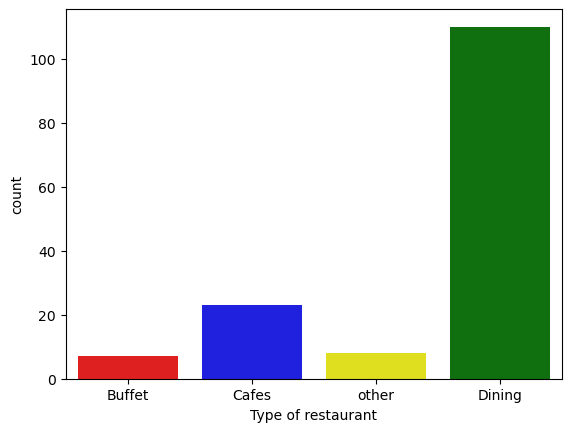

In [19]:
sns.countplot(x='listed_in(type)',data=df,hue='listed_in(type)',palette=["red","blue","yellow","green"],legend=False)
plt.xlabel("Type of restaurant")
plt.show()

conclusion - majority of the customers order from Dining.

# Q2.  How many votes has each type of restaurant received from customers ?

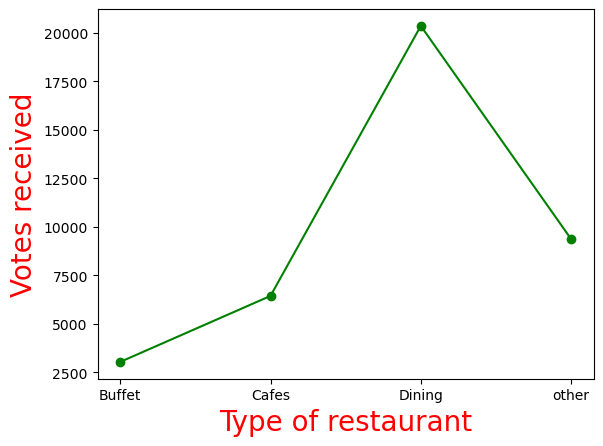

In [23]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("Votes received",c="red",size=20)
plt.show()

conclusion - Dining restaurants has received maximum votes.

# Q3. What are the ratings that majority of restaurants have received ?

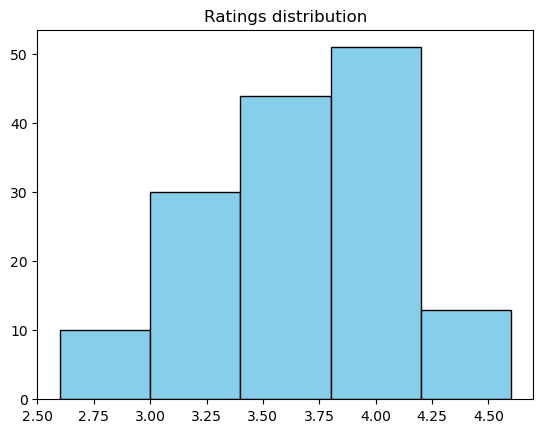

In [33]:
plt.hist(df['rate'],bins=5,color='skyblue',edgecolor='black')
plt.title("Ratings distribution")
plt.show()

conclusion - The majority restaurants received ratings from 3.50 to 4.00 .

# Q4. zomato has observed that most couples order most of their food online . What is their avg spendings on each order ?

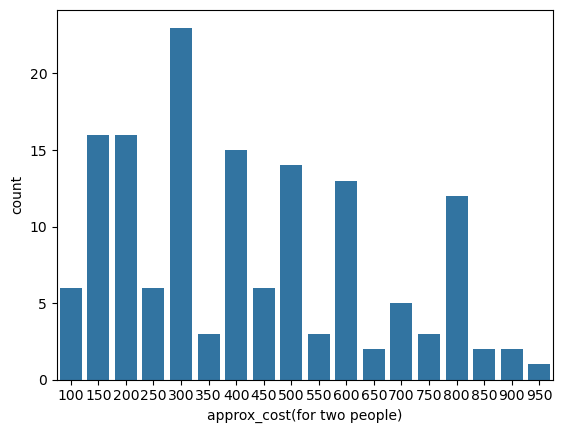

In [36]:
couple_data=df[('approx_cost(for two people)')]
sns.countplot(x=couple_data)
plt.show()

conclusion - majority of couples spend approximately 300 rupees.

# Q5. Which mode (offline/online) has received maximum rating ?

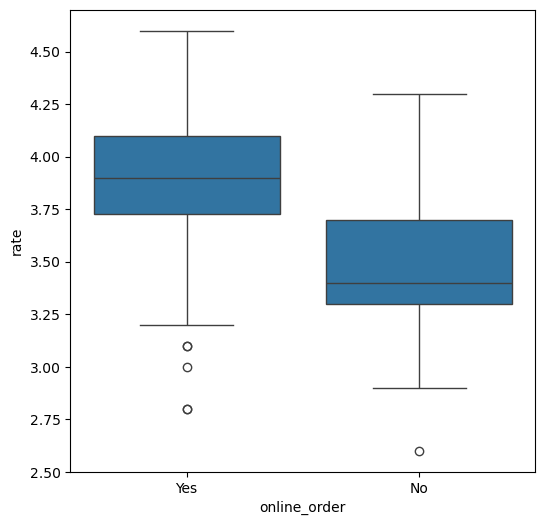

In [39]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

conclusion - Online order received higher rating as compared to Offline order.

# Q6. What type of restaurant received more offline orders ,so that zomato can partner with customers with some good offers ?

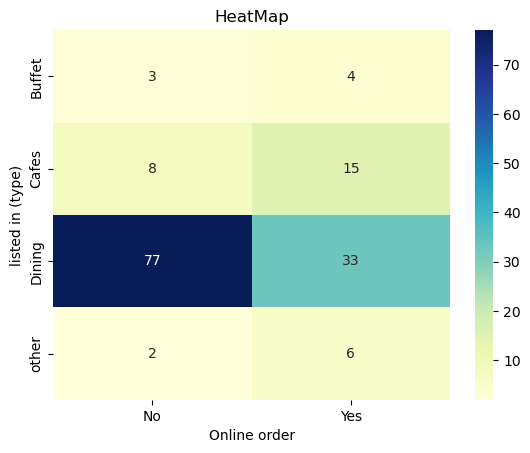

In [47]:
pivot_table = df.pivot_table(index='listed_in(type)',columns = 'online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("HeatMap")
plt.xlabel("Online order")
plt.ylabel("listed in (type)")
plt.show()

conclusion - Dining restaurants primarily accept offline orders , whereas cafes primarily receive online orders . This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.